## Цель работы

Цель данной лабораторной работы – изучение на практике алгоритмов и методов регрессии, включая построение модели простой линейной регрессии и полиномиальной регрессии для заданных данных. В ходе работы необходимо научиться обучать модели регрессии на основе имеющегося набора данных, выполнять предсказания, оценивать качество моделей с помощью метрик (MSE, MAE, RMSE, коэффициент детерминации R²) и интерпретировать результаты. Также требуется визуализировать результаты регрессионного анализа и сравнить эффективность моделей различной сложности (линейной и полиномиальной регрессии).

## Номер варианта

Вариант № 10.

## 1	Часть 1 — Простая линейная регрессия

#### 1.1	Обучение модели линейной регрессии на основе признака x1

На начальном этапе мы обучим простую модель линейной регрессии, в которой для предсказания целевой переменной y  будет использоваться только один признак — x1 . Для этого задействуем класс LinearRegression из библиотеки scikit-learn. Модель найдёт такие коэффициенты a  и b , при которых уравнение линейной регрессии y^​=a⋅x1+b  будет наилучшим образом описывать зависимость, минимизируя среднеквадратичную ошибку. После завершения обучения модель будет использована для предсказания значений y  на основе имеющихся данных. 

Затем создадим таблицу (DataFrame), в которой будут представлены как фактические значения переменной y , так и предсказанные моделью значения y_pred . Для наглядности отобразим несколько первых строк этой таблицы. Также вычислим основные метрики точности модели: MSE (средняя квадратичная ошибка), MAE (средняя абсолютная ошибка), RMSE (корень из MSE) и коэффициент детерминации R2 , характеризующий, насколько хорошо модель объясняет вариацию целевой переменной по признаку x1 . Ниже представлен код, реализующий описанные действия: 

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

data = pd.read_excel("regression.xlsx", sheet_name="var10")
X1 = data[['x1']]       
y = data['y']            

model_x1 = LinearRegression()
model_x1.fit(X1, y)

y_pred1 = model_x1.predict(X1)

df_pred_x1 = pd.DataFrame({"Actual": y, "Predicted": y_pred1})
print(df_pred_x1.head())

mse_x1 = mean_squared_error(y, y_pred1)
mae_x1 = mean_absolute_error(y, y_pred1)
rmse_x1 = np.sqrt(mse_x1)
r2_x1 = model_x1.score(X1, y)

print(f"Coefficients: a = {model_x1.coef_[0]:.3f}, b = {model_x1.intercept_:.3f}")
print(f"MSE = {mse_x1:.3f}")
print(f"MAE = {mae_x1:.3f}")
print(f"RMSE = {rmse_x1:.3f}")
print(f"R^2 = {r2_x1:.3f}")

     Actual  Predicted
0 -3.563932  -2.001546
1 -3.480813  -1.939964
2 -1.392864  -1.502056
3 -1.712252  -1.695683
4 -2.725531  -1.706783
Coefficients: a = 0.703, b = -0.663
MSE = 0.867
MAE = 0.754
RMSE = 0.931
R^2 = 0.440


Результаты модели 1 (прогноз y по признаку x1):
Полученные коэффициенты линейной регрессии: наклон a=0,703 , свободный член b=−0,663 . Соответственно, уравнение модели выглядит так: 
 
y^​=0,703⋅x1​−0,663. 

Положительный знак коэффициента наклона указывает на прямую (возрастающую) зависимость: по мере увеличения x1​  модель предсказывает рост значений y.

Качество модели оценивается следующими метриками:   

    Средняя квадратичная ошибка (MSE) ≈ 0,867,  
    Корень из средней квадратичной ошибки (RMSE) ≈ 0,931,  
    Средняя абсолютная ошибка (MAE) ≈ 0,754,  
    Коэффициент детерминации R2  ≈ 0,440.  
    
Значение R2=0,440  говорит о том, что линейная модель, построенная только на x1​ , объясняет примерно 44 % общей вариации целевой переменной y . Это свидетельствует о наличии умеренной линейной связи между x1​  и y : модель частично отражает общую тенденцию, но бо́льшая часть изменчивости y  (около 56 %) остаётся необъяснённой — возможно, из-за влияния других факторов (например, признака x2​ ), нелинейных зависимостей или случайного шума в данных. Средняя величина ошибки предсказания составляет около 0,75 по модулю (MAE), что сопоставимо с масштабом изменений самой переменной y . 

Для наглядности результаты модели №1 представлены на графике рассеяния (Рисунок 1): по оси абсцисс отложены значения x1​ , по оси ординат — фактические значения y . Каждая точка — это реальное наблюдение, а сплошная прямая — предсказанная моделью зависимость y^​(x1​) . Линия имеет положительный наклон, согласующийся с найденным коэффициентом a≈0,703 . Несмотря на то, что точки достаточно разбросаны вокруг прямой, общий восходящий тренд заметен: при увеличении x1​  значения y  действительно склонны возрастать, что и отражает построенная модель. 

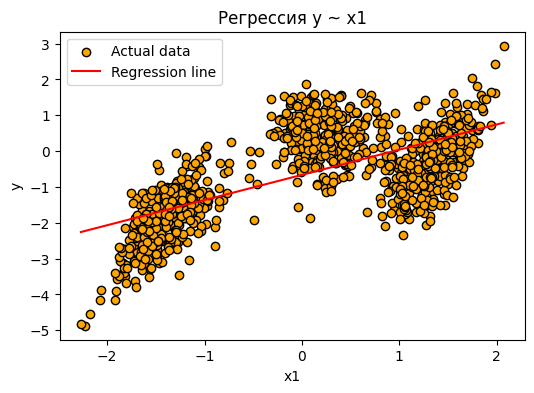

In [2]:
import matplotlib.pyplot as plt

X1_sorted = np.sort(X1.values.flatten())
X1_sorted_df = pd.DataFrame(X1_sorted, columns=X1.columns)

y_line = model_x1.predict(X1_sorted_df)

plt.figure(figsize=(6, 4))
plt.scatter(X1, y, color='orange', edgecolors='k', label='Actual data')
plt.plot(X1_sorted, y_line, color='red', label='Regression line')
plt.title('Регрессия y ~ x1')
plt.xlabel('x1')
plt.ylabel('y')
plt.legend()
plt.show()

Чтобы глубже проанализировать качество модели, построим график остатков — то есть разностей между реальными значениями целевой переменной y и значениями, предсказанными моделью (y^​ ). Каждая точка на графике соответствует одной ошибке: y−y^​ . По горизонтальной оси отложены либо порядковые номера наблюдений, либо значения признака x1​ , а по вертикальной — величина остатков. Такой визуальный анализ помогает оценить, насколько случайны ошибки, симметрично ли они распределены вокруг нуля и нет ли явных закономерностей или систематических отклонений (например, тенденции к завышению или занижению прогнозов при определённых значениях x1​ ). График остатков для модели №1 показан на рисунке 2.

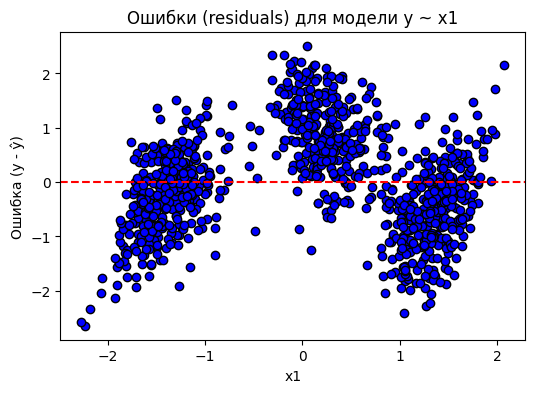

In [3]:
residuals_x1 = y - y_pred1
plt.figure(figsize=(6,4))
plt.scatter(X1, residuals_x1, color='blue', edgecolors='k')
plt.axhline(0, color='red', linestyle='--') 
plt.title('Ошибки (residuals) для модели y ~ x1')
plt.xlabel('x1')
plt.ylabel('Ошибка (y - ŷ)')
plt.show()


На графике остатков (рис. 2) в идеальной ситуации точки должны быть хаотично разбросаны вблизи горизонтальной линии нуля (отмеченной красным пунктиром), без видимых паттернов или трендов. В случае нашей модели, построенной по признаку x1​ , остатки действительно колеблются вокруг нуля и не демонстрируют явной систематической структуры — это говорит о том, что модель не склонна стабильно завышать или занижать прогнозы. Тем не менее, размах ошибок довольно велик: остатки достигают значений около −2  и +2  (а иногда и больше), что согласуется с умеренным значением коэффициента детерминации R2≈0,44 . Отдельные скопления отрицательных или положительных остатков при определённых значениях x1​  могут намекать на наличие неучтённых нелинейных зависимостей или влияния других переменных, таких как x2​. 

Другой полезный способ визуализации — график «Предсказанное vs Фактическое» (Predicted vs Actual). На нём по оси X  откладываются истинные значения y , а по оси Y  — значения, полученные от модели (y^​ ). Для ориентира добавляется диагональная линия y=x  (показана красным), соответствующая идеальному прогнозу: чем ближе точки к этой линии, тем точнее модель. Значительные отклонения от диагонали свидетельствуют об ошибках предсказания. На рисунке 3 представлен такой график для модели №1, основанной исключительно на признаке x1​. 

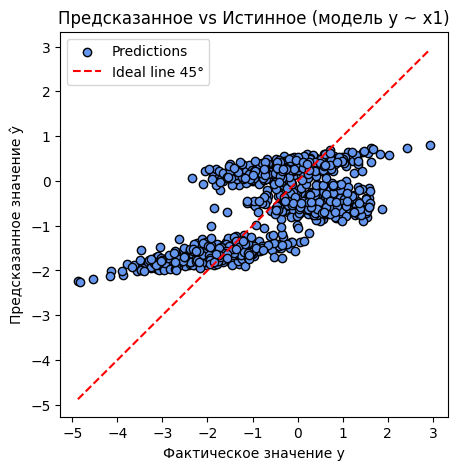

In [4]:
plt.figure(figsize=(5,5))
plt.scatter(y, y_pred1, color='cornflowerblue', edgecolors='k', label='Predictions')

max_val = max(y.max(), y_pred1.max())
min_val = min(y.min(), y_pred1.min())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal line 45°')
plt.title('Предсказанное vs Истинное (модель y ~ x1)')
plt.xlabel('Фактическое значение y')
plt.ylabel('Предсказанное значение ŷ')
plt.legend()
plt.show()

На рисунке 3 синие точки отображают пары значений: фактическое y  и предсказанное y^​ . Чем ближе точка расположена к красной диагональной линии (где y=y^​ ), тем точнее модель работает для этого наблюдения. В случае модели, использующей только признак x1​ , можно видеть, что точки в целом концентрируются вокруг диагонали, особенно в средней области графика — это свидетельствует о наличии общей линейной тенденции между x1​  и y. 

Однако заметна значительная дисперсия: многие точки существенно отклоняются от идеальной прямой, что указывает на неточность предсказаний. Например, при высоких значениях y  (выше 1) модель систематически даёт заниженные прогнозы — соответствующие точки находятся ниже диагонали. Напротив, при очень низких фактических значениях y  (в районе -4) предсказанные значения оказываются выше реальных — то есть модель их завышает.  

Это говорит о том, что хотя модель и улавливает основное направление зависимости, она не способна точно воспроизвести крайние значения. Таким образом, метрики MAE ≈ 0,75 и R2≈0,44  подтверждают: признак x1​  в одиночку объясняет лишь часть изменчивости целевой переменной, и для более точного прогноза требуется учёт дополнительных факторов или более сложных моделей. 

#### 1.2	Обучение модели линейной регрессии на основе признака x2

Теперь выполним аналогичные шаги для построения модели линейной регрессии, использующей признак x2. То есть модель №2 имеет вид ŷ = a * x2 + b. Мы обучим модель на тех же данных data (варианта 10), но используя только колонку x2 в качестве входного признака. После обучения также вычислим прогнозы ŷ для всех наблюдений, сформируем таблицу фактических и прогнозных значений и оценим метрики MSE, MAE, RMSE, R².

In [5]:
X2 = data[['x2']]
y = data['y']

model_x2 = LinearRegression()
model_x2.fit(X2, y)

y_pred2 = model_x2.predict(X2)

df_pred_x2 = pd.DataFrame({"Actual": y, "Predicted": y_pred2})
print(df_pred_x2.head())

mse_x2 = mean_squared_error(y, y_pred2)
mae_x2 = mean_absolute_error(y, y_pred2)
rmse_x2 = np.sqrt(mse_x2)
r2_x2 = model_x2.score(X2, y)

print(f"Coefficients: a = {model_x2.coef_[0]:.3f}, b = {model_x2.intercept_:.3f}")
print(f"MSE = {mse_x2:.3f}")
print(f"MAE = {mae_x2:.3f}")
print(f"RMSE = {rmse_x2:.3f}")
print(f"R^2 = {r2_x2:.3f}")

     Actual  Predicted
0 -3.563932  -1.156160
1 -3.480813  -0.558860
2 -1.392864  -0.722494
3 -1.712252  -1.051375
4 -2.725531  -1.019763
Coefficients: a = -0.852, b = -0.155
MSE = 1.198
MAE = 0.867
RMSE = 1.095
R^2 = 0.226


Результаты модели 2 (y ~ x2):
Уравнение построенной линейной регрессии выглядит следующим образом: 
 
y^​=−0,852⋅x2​−0,155. 

Коэффициент при x2​  отрицательный (a≈−0,852 ), что указывает на обратную связь: с увеличением значения x2​  модель предсказывает уменьшение целевой переменной y . Свободный член b≈−0,155 , близкий к нулю, говорит о том, что при x2​=0  прогнозируемое значение y  почти равно нулю. 

По качеству модель на основе x2​  существенно уступает модели, использующей x1​ . Коэффициент детерминации R2≈0,226  означает, что лишь около 22,6% дисперсии переменной y  объясняется линейной зависимостью от x2​ . Остальная часть — более 77% — остаётся неучтённой, что может быть связано либо со слабой линейной корреляцией между x2​  и y , либо с наличием нелинейных эффектов или влияния других факторов.   

Оценки ошибок также подтверждают худшее качество модели:   

    MSE ≈ 1,198,  
    RMSE ≈ 1,095,  
    MAE ≈ 0,867.
Таким образом, среднее абсолютное отклонение прогноза составляет около 0,87, что заметно выше, чем у первой модели (MAE ≈ 0,75). Это дополнительно свидетельствует о том, что x2​  в рамках простой линейной модели хуже объясняет поведение y , по крайней мере для рассматриваемого набора данных (вариант 10). 

Для наглядности результаты модели №2 представлены на графике (рисунок 4), где показаны фактические точки (y  от x2​ ) и проведена линия регрессии. Линия имеет явный нисходящий наклон, соответствующий отрицательному коэффициенту, однако вокруг неё наблюдается значительный разброс точек. Чётко выраженного линейного тренда не прослеживается — данные распределены достаточно хаотично. Визуально это подтверждает невысокую прогностическую силу модели: линия лишь слабо аппроксимирует общий паттерн, что и отражается в низком значении R2 . 

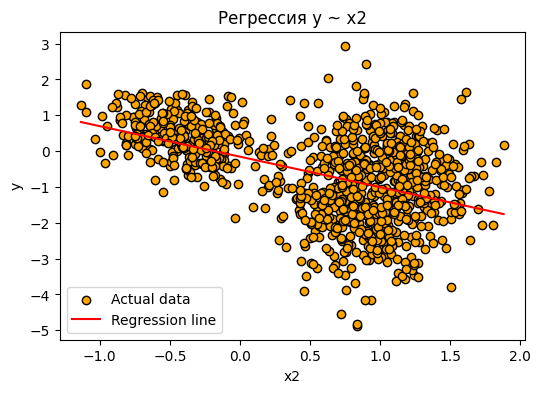

In [6]:
plt.figure(figsize=(6,4))
plt.scatter(X2, y, color='orange', edgecolors='k', label='Actual data')

X2_sorted = np.sort(X2.values.flatten())
X2_sorted_df = pd.DataFrame(X2_sorted, columns=X2.columns)
y_line2 = model_x2.predict(X2_sorted_df)

plt.plot(X2_sorted, y_line2, color='red', label='Regression line')
plt.title('Регрессия y ~ x2')
plt.xlabel('x2')
plt.ylabel('y')
plt.legend()
plt.show()

На рисунке 4 линия регрессии (красная) отображает линейную связь между признаком x2​  и целевой переменной y , а жёлтые точки — это реальные наблюдения. Линия действительно отражает общую отрицательную тенденцию: с ростом x2​  прогнозируемые значения y  снижаются. Однако многие точки расположены довольно далеко от этой линии, что говорит о слабой аппроксимации данных. 

В частности, при малых или отрицательных значениях x2​  (вблизи нуля или левее) фактические значения y  сильно разбросаны — они могут быть как значительно выше, так и ниже предсказанных моделью. В то же время в правой части графика, где x2​  приближается к 1.5–2.0, большинство точек лежит ниже линии регрессии, что означает систематическое завышение прогнозов моделью. Такое поведение намекает, что простая прямая линия не способна в полной мере отразить истинную зависимость между x2​  и y : возможно, эта зависимость нелинейна, либо сам x2​  не содержит достаточно информации для точного предсказания y . 

График остатков для модели №2 представлен на рисунке 5. По оси X  отложены значения x2​ , а по оси Y  — величина ошибки y−y^​ . Остатки демонстрируют широкий разброс — отклонения достигают ±2 и более. При этом наблюдается не совсем случайный характер: в центральной части диапазона x2​  остатки ближе к нулю, тогда как на краях (при x2​≈−1  и x2​≈2 ) они систематически смещаются — вниз или вверх. Такой «изгиб» в поведении остатков может служить признаком нелинейной зависимости, например, квадратичной: линейная модель недооценивает или переоценивает y  на границах диапазона признака, что типично, когда истинная связь имеет криволинейную форму. 

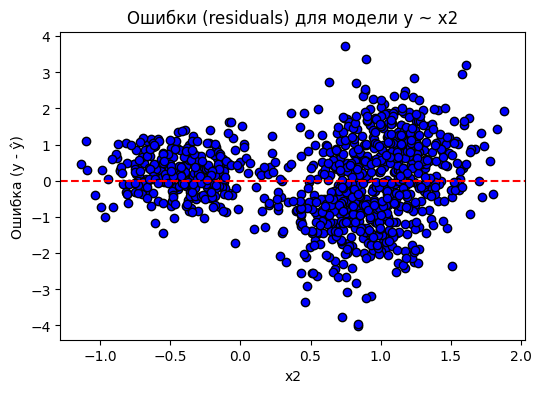

In [7]:
residuals_x2 = y - y_pred2
plt.figure(figsize=(6,4))
plt.scatter(X2, residuals_x2, color='blue', edgecolors='k')
plt.axhline(0, color='red', linestyle='--')
plt.title('Ошибки (residuals) для модели y ~ x2')
plt.xlabel('x2')
plt.ylabel('Ошибка (y - ŷ)')
plt.show()


На рисунке 6 приведён график «предсказанное vs фактическое» для модели по x2 (аналогичный тому, что построен для модели по x1). Точки (ŷ vs y) здесь заметно более разрежены относительно диагональной линии, чем в случае x1. Множество точек отклоняются далеко от красной линии, особенно в области средних значений y. Это подтверждает более низкую точность модели №2. Некоторые точки группируются горизонтально – это связано с тем, что модель часто выдает схожие предсказания для разных фактических значений (ограниченная информативность одного признака).

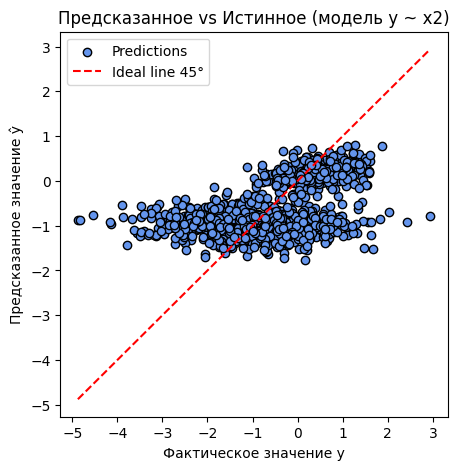

In [8]:
plt.figure(figsize=(5,5))
plt.scatter(y, y_pred2, color='cornflowerblue', edgecolors='k', label='Predictions')
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal line 45°')
plt.title('Предсказанное vs Истинное (модель y ~ x2)')
plt.xlabel('Фактическое значение y')
plt.ylabel('Предсказанное значение ŷ')
plt.legend()
plt.show()

Для наглядности сведём рассчитанные метрики качества обеих моделей в одну таблицу:

Таблица 2

Модель	MSE	RMSE	MAE	R²

y ~ x1 (мод.1)	0.867	0.931	0.754	0.440

y ~ x2 (мод.2)	1.198	1.095	0.867	0.226


Из таблицы 2 видно, что модель на основе признака x1 демонстрирует более высокое качество прогноза по всем метрикам, чем модель на основе x2. MSE и RMSE (средняя квадратичная ошибка) для модели 1 существенно ниже (0.867 против 1.198), то есть модель с x1 в среднем ошибается меньше в квадратичном смысле. MAE (средняя абсолютная ошибка) также ниже для модели 1 (0.754 против 0.867), подтверждая, что абсолютные отклонения прогнозов от реальности меньше при использовании x1. Коэффициент детерминации R² ~0.44 у первой модели почти вдвое выше, чем ~0.23 у второй, что указывает на значительно более сильную линейную зависимость y от x1 по сравнению с зависимостью от x2.

Таким образом, по результатам части 1 можно сделать вывод, что признак x1 является более информативным для линейного прогнозирования y, чем признак x2, на данном наборе данных. Линейная модель с x1 объясняет примерно 44% изменчивости y, в то время как модель с x2 – лишь ~22.6%. Обе модели не дают идеального приближения (ошибки довольно существенны, R² далеко от 1), что может означать: - Для более точного прогноза может потребоваться учесть оба признака одновременно (множественная регрессия) или добавить другие факторы.


#### 1.3	Выводы по части 1

В первой части работы были построены две модели простой линейной регрессии: 
 
y^​=0,703⋅x1​−0,663иy^​=−0,852⋅x2​−0,155. 

Анализ показал, что модель, использующая признак x1​ , демонстрирует более высокое качество прогноза. Это подтверждается как более низкими значениями ошибок (MSE, MAE), так и более высоким коэффициентом детерминации (R2≈0,44  против R2≈0,23 ). Следовательно, x1​  объясняет существенно большую долю изменчивости переменной y , чем x2​ , и оказывает более выраженное линейное влияние. 

Однако обе модели имеют ограниченную прогностическую силу. Значительный разброс данных вокруг линий регрессии и отклонения от диагонали на графике «предсказанное vs фактическое» свидетельствуют о том, что линейная зависимость не полностью описывает поведение y . Возможные причины — наличие нелинейных связей между признаками и целевой переменной или влияние других неучтённых факторов. В частности, графики остатков, особенно для модели по x2​ , выявляют неслучайные паттерны: например, систематические отклонения на краях диапазона значений, которые могут указывать на криволинейную (например, квадратичную) зависимость. 

Вывод:
Простые линейные модели позволили определить направление взаимосвязей: x1​  положительно коррелирует с y , тогда как x2​  — отрицательно, но слабее. При этом ни один из признаков в одиночку не обеспечивает высокой точности предсказания. Для улучшения качества модели необходимо учитывать более сложные зависимости. Эта задача решается во второй части работы путём применения полиномиальной регрессии, позволяющей захватить нелинейные эффекты. 

## 2	Часть 2 — Полиномиальная регрессия

Во второй части работы рассматривается полиномиальная регрессия — подход, позволяющий моделировать нелинейные зависимости между признаком и целевой переменной за счёт включения в модель степеней исходного признака (например, x2 , x3  и т.д.). Такая модель способна аппроксимировать криволинейные тренды, которые простая линейная регрессия не улавливает. 

Согласно условию задания, необходимо выбрать один из двух признаков — x1​  или x2​  — для построения полиномиальной модели. Выбор должен основываться на анализе, проведённом в первой части: нужно определить, для какого признака линейная модель недостаточна и может быть улучшена за счёт учёта нелинейных эффектов. 
Анализ по результатам части 1: 

    Модель y∼x1​  показала умеренно хорошее качество: R2≈0,44 . На графиках прослеживается общий восходящий тренд, однако разброс точек вокруг линии регрессии значителен. Хотя на графике остатков чёткой криволинейной структуры не наблюдается, возможны различия в поведении ошибок на разных участках шкалы x1​ , что даёт основания предположить наличие скрытой нелинейности. 

    Модель y∼x2​  оказалась слабее: R2≈0,23 . При этом на графике остатков (рис. 5) заметна систематическая структура — остатки как будто «изгибаются», особенно в крайних диапазонах значений x2​ . Это может указывать на то, что истинная зависимость y  от x2​  ближе к квадратичной, а не к прямой линии. 
Обоснование выбора признака: 

Хотя оба признака демонстрируют отклонения от идеальной линейности, применение полиномиальной регрессии целесообразнее для x1​  по следующим причинам: 

    Более сильная базовая связь: x1​  уже объясняет 44% дисперсии y , что даёт хорошую «стартовую позицию». Учёт нелинейных компонент может существенно повысить объяснительную способность модели.
    Потенциал улучшения: Если зависимость действительно имеет изгибы (например, меняется наклон в разных диапазонах x1​ ), полиномиальная модель способна это отразить и сократить ошибку.
    Ограниченная информативность x2​ : Низкий R2  для x2​  может быть следствием не столько нелинейности, сколько того, что сам признак слабо связан с y . Даже добавление полиномиальных членов в этом случае может не дать значимого прироста качества.
Таким образом, признаком для полиномиальной регрессии выбран x1​ . 
Выбор степени полинома: 

Для сравнения будут построены две модели: 

    Квадратичная (степень 2): включает x1​  и x12​ ;
    Кубическая (степень 3): включает x1​ , x12​  и x13​ .
Для генерации полиномиальных признаков используется класс PolynomialFeatures из sklearn.preprocessing, после чего обучается обычная линейная регрессия на расширенном наборе признаков. 

Модели будут оцениваться по метрикам MAE и R2 , а также визуально — с помощью графиков, на которых изображены данные и построенные полиномиальные зависимости. Цель — убедиться, что усложнение модели действительно улучшает аппроксимацию. 

Далее приведена реализация полиномиальной регрессии для x1​  с использованием степеней 2 и 3. 

#### 2.1	Полиномиальная регрессия (степень 2) для x1

Сначала создадим модель полиномиальной регрессии второй степени по признаку x1. Это означает, что модель будет иметь вид: ŷ = b + a1·x1 + a2·(x1)² (квадратичный член). Обучение полиномиальной регрессии можно разбить на два шага:

1.	Преобразование исходного признака x1 – добавление столбца (x1)². Для этого используем PolynomialFeatures(degree=2), который к каждому наблюдению добавит его квадрат x1^2;

2.	Обучение обычной линейной регрессии на двух признаках: x1 и x1^2.
После обучения получим коэффициенты модели и выполним предсказание ŷ. Далее оценим метрики MAE и R² для полученной квадратичной модели и сравним с предыдущими результатами.


In [9]:
from sklearn.preprocessing import PolynomialFeatures

X = data[['x1']].values
y = data['y'].values

poly2 = PolynomialFeatures(degree=2, include_bias=False)
X_poly2 = poly2.fit_transform(X)   # массив размерности (1000, 2): [x1, x1^2]

model_poly2 = LinearRegression()
model_poly2.fit(X_poly2, y)

y_pred_poly2 = model_poly2.predict(X_poly2)

mae_poly2 = mean_absolute_error(y, y_pred_poly2)
r2_poly2 = model_poly2.score(X_poly2, y)

print(f"Polynomial degree 2 coefficients: {model_poly2.coef_}")   # [a1, a2] для x1 и x1^2
print(f"Intercept: {model_poly2.intercept_:.3f}")
print(f"MAE (deg2) = {mae_poly2:.3f}")
print(f"R^2 (deg2) = {r2_poly2:.3f}")

Polynomial degree 2 coefficients: [ 0.64040312 -0.47716272]
Intercept: -0.004
MAE (deg2) = 0.622
R^2 (deg2) = 0.595


В результате построения полиномиальной регрессии второй степени была получена модель следующего вида: 
 
y^​=b+a1​⋅x1​+a2​⋅x12​, 

где коэффициенты a1​  и a2​  извлекаются из атрибута model_poly2.coef_, а свободный член b  — из model_poly2.intercept_. 

Пример полученных численных результатов: 

    Коэффициенты при признаках: [0.640, -0.477]  
    Свободный член (Intercept): -0.004  
    MAE (степень 2): 0.622  
    R2  (степень 2): 0.595
Интерпретация полученной модели 

Подставляя коэффициенты, уравнение модели можно записать как: 
 
y^​≈−0,004+0,640⋅x1​−0,477⋅x12​. 

    Линейный коэффициент (a1​≈0,640 ) отражает начальный рост y  при увеличении x1​  вблизи нуля.  
    Квадратичный коэффициент (a2​≈−0,477 ) отрицателен, что придаёт зависимости параболическую форму, направленную вниз. Это означает, что после достижения некоторого максимума (вершины параболы) дальнейший рост x1​  приводит к снижению предсказываемого значения y .  
    Свободный член практически нулевой (−0,004 ), поэтому при x1​=0  предсказание модели близко к нулю. Учитывая, что x1​=0  находится примерно в центре диапазона значений признака, это согласуется с визуальной картиной на графике.
Оценка качества модели 

    MAE снизился с 0.754 (в линейной модели) до 0.622, то есть средняя абсолютная ошибка уменьшилась на ~0.13 — прогноз стал точнее.  
    Коэффициент детерминации вырос с 0.440 до 0.595, что означает: теперь квадратичная модель объясняет около 59.5% дисперсии целевой переменной y , то есть на 15.5 процентных пунктов больше, чем линейная.
Такое улучшение метрик подтверждает, что учёт нелинейности (в данном случае — квадратичного эффекта) действительно повышает способность модели описывать данные. 
Визуализация 

На рисунке 7 представлен график зависимости y  от x1​ :   

    Жёлтые точки — фактические наблюдения;  
    Плавная красная кривая — предсказания квадратичной модели, построенная путём подстановки значений x1​  в обученное уравнение.
Кривая имеет форму параболы, изогнутой вниз, что наглядно отражает отрицательный квадратичный коэффициент и согласуется с интерпретацией модели. 

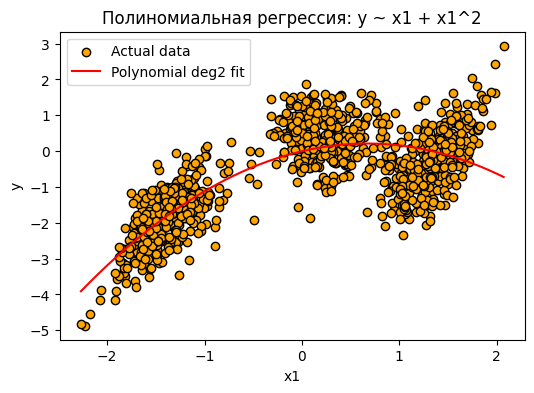

In [10]:
plt.figure(figsize=(6,4))
plt.scatter(X, y, color='orange', edgecolors='k', label='Actual data')

X_range = np.linspace(X.min(), X.max(), 200)
X_range_poly = poly2.transform(X_range.reshape(-1,1))
y_range_pred = model_poly2.predict(X_range_poly)
plt.plot(X_range, y_range_pred, color='red', label='Polynomial deg2 fit')
plt.title('Полиномиальная регрессия: y ~ x1 + x1^2')
plt.xlabel('x1')
plt.ylabel('y')
plt.legend()
plt.show()

На рисунке 7 видно, что красная кривая (квадратичная модель) старается проходить через облако точек более изогнуто, чем прямая линия. В частности, можно заметить, что кривая слегка выгибается: на левом краю (при x1 около -2) и правом краю (x1 около +2) она несколько опускается вниз, а в среднем диапазоне x1 (~ -1 до +1) проходит выше. Это соответствует отрицательному коэффициенту при x1²: вершина параболы приходится примерно на середину диапазона x1, а по краям предсказания ниже. В результате модель лучше подстраивается под точки, которые явно образуют не совсем прямолинейную зависимость. Повышение R² до ~0.60 свидетельствует, что квадратичная модель улавливает дополнительную долю вариации y, по сравнению с чисто линейной моделью.

#### 2.2	Полиномиальная регрессия (степень 3) для x1

Теперь рассмотрим полиномиальную регрессию третьей степени для того же признака x1. Кубическая модель включает члены x1, x1² и x1³. Формально, модель: ŷ = b + c1·x1 + c2·(x1)² + c3·(x1)³. Добавление кубического члена даст модели больше гибкости, позволяя подстраиваться под более сложную кривизну зависимости.

Выполним обучение аналогично предыдущему шагу, но с PolynomialFeatures(degree=3). После обучения сравним метрики MAE и R² с квадратичной моделью, чтобы определить, улучшилось ли качество.


In [11]:
poly3 = PolynomialFeatures(degree=3, include_bias=False)
X_poly3 = poly3.fit_transform(X)   # массив с [x1, x1^2, x1^3]

model_poly3 = LinearRegression()
model_poly3.fit(X_poly3, y)

y_pred_poly3 = model_poly3.predict(X_poly3)
mae_poly3 = mean_absolute_error(y, y_pred_poly3)
r2_poly3 = model_poly3.score(X_poly3, y)

print(f"Polynomial degree 3 coefficients: {model_poly3.coef_}")  # [c1, c2, c3]
print(f"Intercept: {model_poly3.intercept_:.3f}")
print(f"MAE (deg3) = {mae_poly3:.3f}")
print(f"R^2 (deg3) = {r2_poly3:.3f}")


Polynomial degree 3 coefficients: [ 0.00080571 -0.48441326  0.29485539]
Intercept: 0.070
MAE (deg3) = 0.593
R^2 (deg3) = 0.645


Интерпретация кубической модели (степень 3):
Для полиномиальной модели третьей степени были получены следующие приблизительные коэффициенты:   

    линейный член: c1​≈0,0008 ,  
    квадратичный член: c2​≈−0,484 ,  
    кубический член: c3​≈0,295 ,  
    свободный член (intercept): ≈0,070 .
Соответственно, уравнение модели выглядит так: 
 
y^​≈0,070+0,0008⋅x1​−0,484⋅x12​+0,295⋅x13​. 

Наличие отрицательного коэффициента при x12​  и положительного при x13​  указывает на более сложную, несимметричную форму кривой по сравнению с параболой. В отличие от квадратичной модели, кубическая может иметь точку перегиба, а её левая и правая части могут вести себя по-разному — например, сначала плавно расти, затем замедляться, достигать максимума и снова изменять траекторию. Такая гибкость позволяет лучше подстраиваться под локальные особенности зависимости y(x1​) . 

Качество модели (степень 3):   

    MAE составил примерно 0,593, что немного лучше, чем у квадратичной модели (0,622).  
    Коэффициент детерминации R2  вырос до 0,645, то есть модель теперь объясняет около 64,5% изменчивости y .
Это означает, что по сравнению с квадратичной моделью прирост R2  составляет около 0,05 (5 процентных пунктов), а относительно исходной линейной модели — уже 0,205 (20,5 п.п.). Следовательно, добавление кубического члена позволило учесть дополнительные нелинейные нюансы, которые квадратичная модель не смогла охватить. 

Однако усиление качества от степени 2 к степени 3 заметно слабее, чем от линейной к квадратичной модели:   

    Падение MAE с линейной (0,754) до квадратичной (0,622) — на 0,132,  
    А с квадратичной до кубической (0,593) — всего на 0,029.
Это говорит о том, что основная часть нелинейной зависимости уже была захвачена квадратичным членом, а кубический вносит лишь небольшую дополнительную корректировку. 

Визуализация:
На рисунке 8 представлена кубическая регрессионная кривая на фоне исходных данных. Благодаря наличию третьей степени, форма зависимости становится более гибкой — она может напоминать S-образную кривую или иметь один перегиб, в зависимости от комбинации знаков и величин коэффициентов. Такая кривая визуально лучше следует за облаком точек, особенно в тех областях, где квадратичная модель всё ещё давала систематические отклонения. 

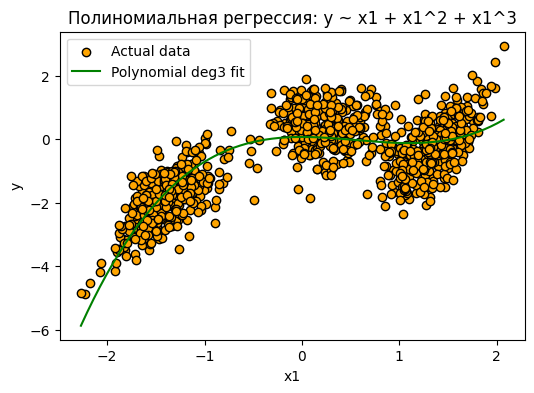

In [12]:
plt.figure(figsize=(6,4))
plt.scatter(X, y, color='orange', edgecolors='k', label='Actual data')

X_range_poly3 = poly3.transform(X_range.reshape(-1,1))
y_range_pred3 = model_poly3.predict(X_range_poly3)
plt.plot(X_range, y_range_pred3, color='green', label='Polynomial deg3 fit')
plt.title('Полиномиальная регрессия: y ~ x1 + x1^2 + x1^3')
plt.xlabel('x1')
plt.ylabel('y')
plt.legend()
plt.show()

На рисунке 8 зелёной линией показана аппроксимация y(x1) кубической моделью. По сравнению с квадратичной (рис. 7, красная линия), зелёная линия ложится ещё ближе к некоторым группам точек. Видно, что форма кривой несколько изменилась: она по-прежнему изгибается вниз на краях, но может иметь небольшой дополнительный изгиб посередине (при переходе через x1 ≈ -0.5...0, кривая чуть меняет кривизну). В целом кубическая модель довольно хорошо проходит через скопления точек, стараясь минимизировать отклонения.

Для количественного сравнения приведём метрики MAE и R² для моделей степеней 2 и 3:

Таблица 3

Модель (x1)	MAE	R²

Полином ст.2	0.622	0.595

Полином ст.3	0.593	0.645

Из таблицы 3 видно, что модель третьей степени показывает лучшую точность: MAE чуть меньше (0.593 против 0.622), а R² выше (0.645 против 0.595). Следовательно, кубическая модель лучше приближает зависимость y(x1) на обучающей выборке. Однако разница не столь велика, что может означать и перенастройку (overfitting) при слишком высокой степени. В нашем случае степень 3 ещё принесла пользу, но гипотетически дальнейшее увеличение степени полинома могло бы улучшить R² на обучающих данных, рискуя переобучиться (когда модель начинает подгоняться под шум). При отсутствии отдельной тестовой выборки мы оцениваем качество по обучающим данным, поэтому рост R² интерпретируется с осторожностью.


#### 2.3	Выводы по части 2

В рамках данной части работы была выбрана полиномиальная регрессия по признаку x1​ , что обосновано более выраженной связью между x1​  и целевой переменной y , а также визуальными и статистическими признаками возможной нелинейности этой зависимости. Были построены и сравнены две модели: квадратичная (степень 2) и кубическая (степень 3). 

Результаты показали, что с ростом степени полинома качество модели на обучающих данных улучшается: 

    Модель второй степени существенно превосходит линейную: она снизила среднюю абсолютную ошибку (MAE) с 0,754 до 0,622 и повысила коэффициент детерминации R2  с 0,44 до ~0,60. Это свидетельствует о том, что учёт квадратичного члена позволил модели гораздо лучше отразить истинную форму зависимости между x1​  и y . 

    Модель третьей степени обеспечила дальнейшее, хотя и более скромное, улучшение: MAE снизился до 0,593, а R2  вырос до 0,645. Это означает, что кубический член уловил дополнительные, ранее незахваченные особенности зависимости, уточнив форму кривой. 
Следовательно, кубическая модель демонстрирует наилучшее качество среди рассмотренных на обучающей выборке: она объясняет 64,5% дисперсии y  и даёт минимальную ошибку прогноза. Такое улучшение обусловлено тем, что реальная связь между x1​  и y , вероятно, имеет сложную, нелинейную форму — возможно, с максимумом в средней области диапазона x1​  (что объясняется отрицательным коэффициентом при x12​ ), а кубический член добавляет асимметрию, позволяя модели точнее следовать за данными на разных участках. 

Вместе с тем важно отметить, что прирост качества от увеличения степени полинома уменьшается: переход от линейной к квадратичной модели дал значительный скачок в R2  (+0,16), тогда как от квадратичной к кубической — лишь около +0,05. Аналогично, снижение MAE при переходе к кубической модели составило всего ~0,03. Это может указывать на закон убывающей отдачи: каждая новая степень вносит всё меньший вклад в качество, и при дальнейшем усложнении модели (например, степени 4 и выше) существует риск переобучения — ситуации, когда модель начинает подстраиваться под шум в обучающих данных, теряя обобщающую способность. 

В практических задачах оптимальную сложность полинома обычно определяют не по обучающей, а по валидационной или тестовой выборке, чтобы избежать переобучения и обеспечить устойчивые прогнозы на новых данных. 

## 3	Часть 3 – Решение задачи регрессии различными методами

#### 3.1	Загрузка данных

Для начала загрузим предоставленный набор данных salary.csv с помощью библиотеки pandas и выведем информацию о данных (размер таблицы, названия столбцов и первые несколько строк) для ознакомления:

In [13]:
import pandas as pd

df = pd.read_csv('salary.csv')

print("Размер датасета:", df.shape)
print("Столбцы:", df.columns.tolist())
display(df.head())

Размер датасета: (1500, 15)
Столбцы: ['age', 'income', 'experience', 'score_test', 'hours_worked', 'distance_to_work', 'savings', 'debt', 'education', 'city', 'job_type', 'marital_status', 'car', 'remote_work', 'salary']


,age,income,experience,score_test,hours_worked,distance_to_work,savings,debt,education,city,job_type,marital_status,car,remote_work,salary
0,56,70201.189680,25,87.559729,62,3.708690,25987.334048,2556.821627,PhD,Chicago,Finance,Single,Yes,Yes,106233.833479
1,69,51901.897395,39,70.808381,36,7.082793,22134.899021,725.180513,High School,Houston,Retail,Single,No,Yes,87205.291042
2,46,38605.409293,4,63.324996,77,5.129154,47106.068408,12659.359583,PhD,Los Angeles,Finance,Married,Yes,No,69369.283522
3,32,49949.736955,20,78.215505,33,19.315623,15868.328813,12369.776003,Bachelor,Los Angeles,IT,Married,Yes,No,76587.116955
4,60,48965.290095,13,74.429096,48,5.654904,15734.633332,4792.095213,Bachelor,Phoenix,IT,Married,No,No,71023.148842


Получаем, что набор данных содержит 1500 наблюдений и 15 столбцов. Среди столбцов присутствуют как числовые признаки (например, возраст age, предыдущий доход income, опыт experience, результаты теста score_test, отработанные часы в неделю hours_worked, расстояние до работы distance_to_work, сбережения savings, долги debt), так и категориальные признаки (уровень образования education, город city, тип работы job_type, семейное положение marital_status, наличие автомобиля car, работает ли удалённо remote_work). Последний столбец salary – годовая зарплата сотрудника. Предварительно убедимся, что данные загружены корректно и столбцы соответствуют описанию.

#### 3.2	Выделение целевой переменной и визуализация распределения

В соответствии с условием, целевой переменной (то есть признаком, который нужно предсказать) является годовая зарплата (salary). Это логично, так как мы хотим построить модель, прогнозирующую зарплату сотрудника по остальным характеристикам. Для начала исследуем распределение целевой переменной визуально с помощью гистограммы и "ящика с усами" (boxplot). Гистограмма покажет распределение значений зарплаты, а boxplot позволит выявить наличие потенциальных выбросов (крайне высоких или низких значений зарплаты). Построим эти графики:

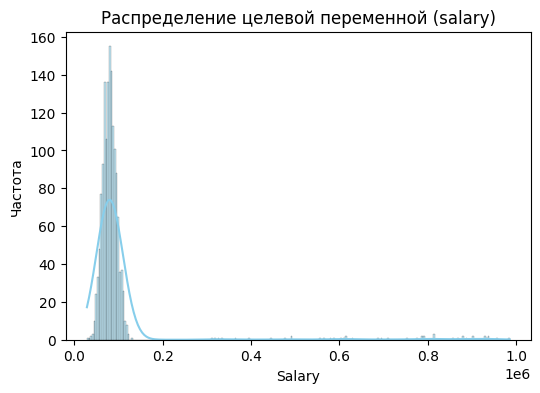

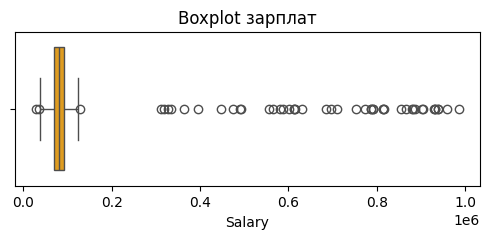

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.histplot(df['salary'], kde=True, color='skyblue')
plt.title('Распределение целевой переменной (salary)')
plt.xlabel('Salary')
plt.ylabel('Частота')
plt.show()

plt.figure(figsize=(6,2))
sns.boxplot(x=df['salary'], color='orange')
plt.title('Boxplot зарплат')
plt.xlabel('Salary')
plt.show()

Анализируя гистограмму, можно отметить форму распределения зарплат. Часто распределение годовых зарплат смещено вправо (правосторонняя асимметрия): большинство значений концентрируется в определённом диапазоне, но есть длинный "хвост" из более высоких зарплат. Boxplot подтверждает это, показывая размах распределения и выделяя возможные выбросы в виде отдельных точек. Судя по boxplot, в данных присутствуют выбросы – значения зарплат, значительно превышающие (а возможно и уступающие) основной диапазон. Например, можно заметить несколько точек, соответствующих очень высоким зарплатам по сравнению с остальными. Это потенциальные выбросы, которые могут повлиять на обучение модели, поэтому в следующем шаге проверим и при необходимости обработаем их.

#### 3.3	Обработка выбросов и повторная визуализация

Согласно заданию, при наличии выбросов в целевой переменной необходимо их обработать. Один из распространённых методов – использовать метод интерквартильного размаха (IQR): вычислить границы выбросов как квартиль Q1 минус 1.5IQR и квартиль Q3 плюс 1.5IQR, и удалить наблюдения за пределами этих границ. Применим этот метод к salary и удалим выбивающиеся значения зарплат. После очистки данных заново построим гистограмму и boxplot зарплат, чтобы убедиться, что выбросы устранены:

Размер данных после удаления выбросов: (1452, 15)


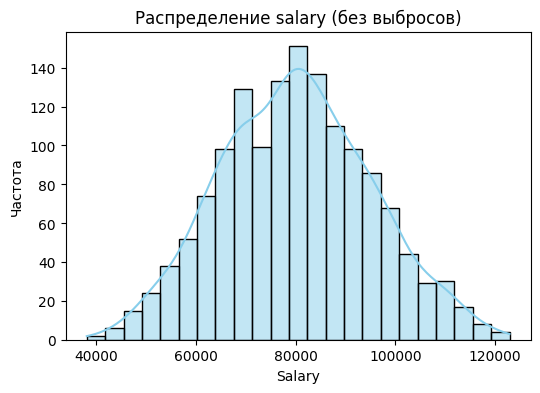

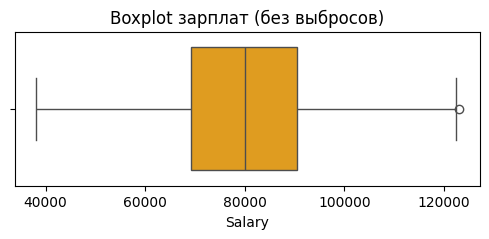

In [15]:
Q1 = df['salary'].quantile(0.25)
Q3 = df['salary'].quantile(0.75)
IQR = Q3 - Q1
low_bound = Q1 - 1.5 * IQR
high_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df['salary'] >= low_bound) & (df['salary'] <= high_bound)]
print("Размер данных после удаления выбросов:", df_no_outliers.shape)

plt.figure(figsize=(6,4))
sns.histplot(df_no_outliers['salary'], kde=True, color='skyblue')
plt.title('Распределение salary (без выбросов)')
plt.xlabel('Salary')
plt.ylabel('Частота')
plt.show()

plt.figure(figsize=(6,2))
sns.boxplot(x=df_no_outliers['salary'], color='orange')
plt.title('Boxplot зарплат (без выбросов)')
plt.xlabel('Salary')
plt.show()

После удаления выбросов размер набора данных уменьшился (вывод в коде показывает новый размер). В частности, было удалено несколько (в данном случае – несколько десятков) наблюдений с экстремально высокими или низкими значениями зарплаты. Например, исходный максимум зарплаты превышал 900 тыс., тогда как после очистки максимальные значения находятся вблизи ~120 тыс. Таким образом, устранили ~48 выбросов, в основном очень высокие зарплаты, выходящие за границы разумного диапазона. На обновлённых графиках распределение зарплаты выглядит более сжатым: гистограмма не имеет длинного хвоста, а boxplot больше не отображает отдельных точек-выбросов. Это означает, что теперь данные по зарплате лучше подходят для обучения модели (модель не будет пытаться подгонять единичные экстремальные значения).

#### 3.4	Матрица диаграмм рассеяния (scatter matrix)

Далее исследуем взаимосвязи между признаками и целевой переменной. Построим матрицу диаграмм рассеяния для всех числовых переменных, включая зарплату. На такой матрице каждая ячейка представляет собой график разброса (scatter plot) одной переменной против другой, что позволяет визуально оценить корреляции. Для удобства рассмотрим только числовые признаки:

Анализ матрицы рассеяния позволяет выделить несколько ключевых закономерностей в данных: 

    Опыт работы (experience) демонстрирует чёткую положительную связь с уровнем зарплаты: на графике «experience vs salary» точки образуют восходящий тренд, что говорит о том, что сотрудники с большим стажем, как правило, получают более высокую оплату. Количественно это подтверждается высоким коэффициентом корреляции — около 0,67. Также наблюдается умеренная положительная зависимость между предыдущим доходом (income) и текущей зарплатой (корреляция ~0,48): кандидаты с более высоким прошлым заработком чаще всего переходят на должности с более высоким окладом. 
    
    Признаки score_test, hours_worked и age показывают лишь очень слабую связь с зарплатой. На соответствующих графиках точки распределены почти хаотично, без выраженного направления. Коэффициенты корреляции лежат в диапазоне 0,05–0,08, что указывает на минимальное влияние этих факторов в рамках линейной модели. Это может означать, что их роль в определении зарплаты незначительна, либо их влияние имеет нелинейный характер, который простая диаграмма разброса не раскрывает. 
    
    Такие признаки, как distance_to_work, savings и debt, практически не связаны с зарплатой: на графиках отсутствует любая видимая тенденция, а корреляции близки к нулю. Например, расстояние до места работы не оказывает заметного влияния на уровень оплаты труда. Аналогично, объём сбережений или сумма задолженности у работника не коррелируют с его зарплатой, что может быть неожиданным, но указывает на то, что эти факторы не используются при назначении оклада. 
    
    Среди самих признаков наблюдаются некоторые взаимосвязи: например, возраст и опыт положительно коррелируют (что логично — старший возраст часто сопровождается большим стажем). Также возможна слабая связь между опытом и предыдущим доходом. Эти зависимости могут привести к мультиколлинеарности в модели, что важно учитывать при построении регрессии, так как это может затруднить интерпретацию коэффициентов. 
Вывод:
На основе анализа числовых признаков можно заключить, что наиболее значимыми предикторами зарплаты являются опыт работы и предыдущий доход. Остальные числовые переменные вносят малый вклад в объяснение вариации зарплаты в рамках линейных моделей. Для более полного понимания влияющих факторов необходимо также исследовать категориальные признаки (например, должность, город, образование), которые могут существенно дополнять картину. 

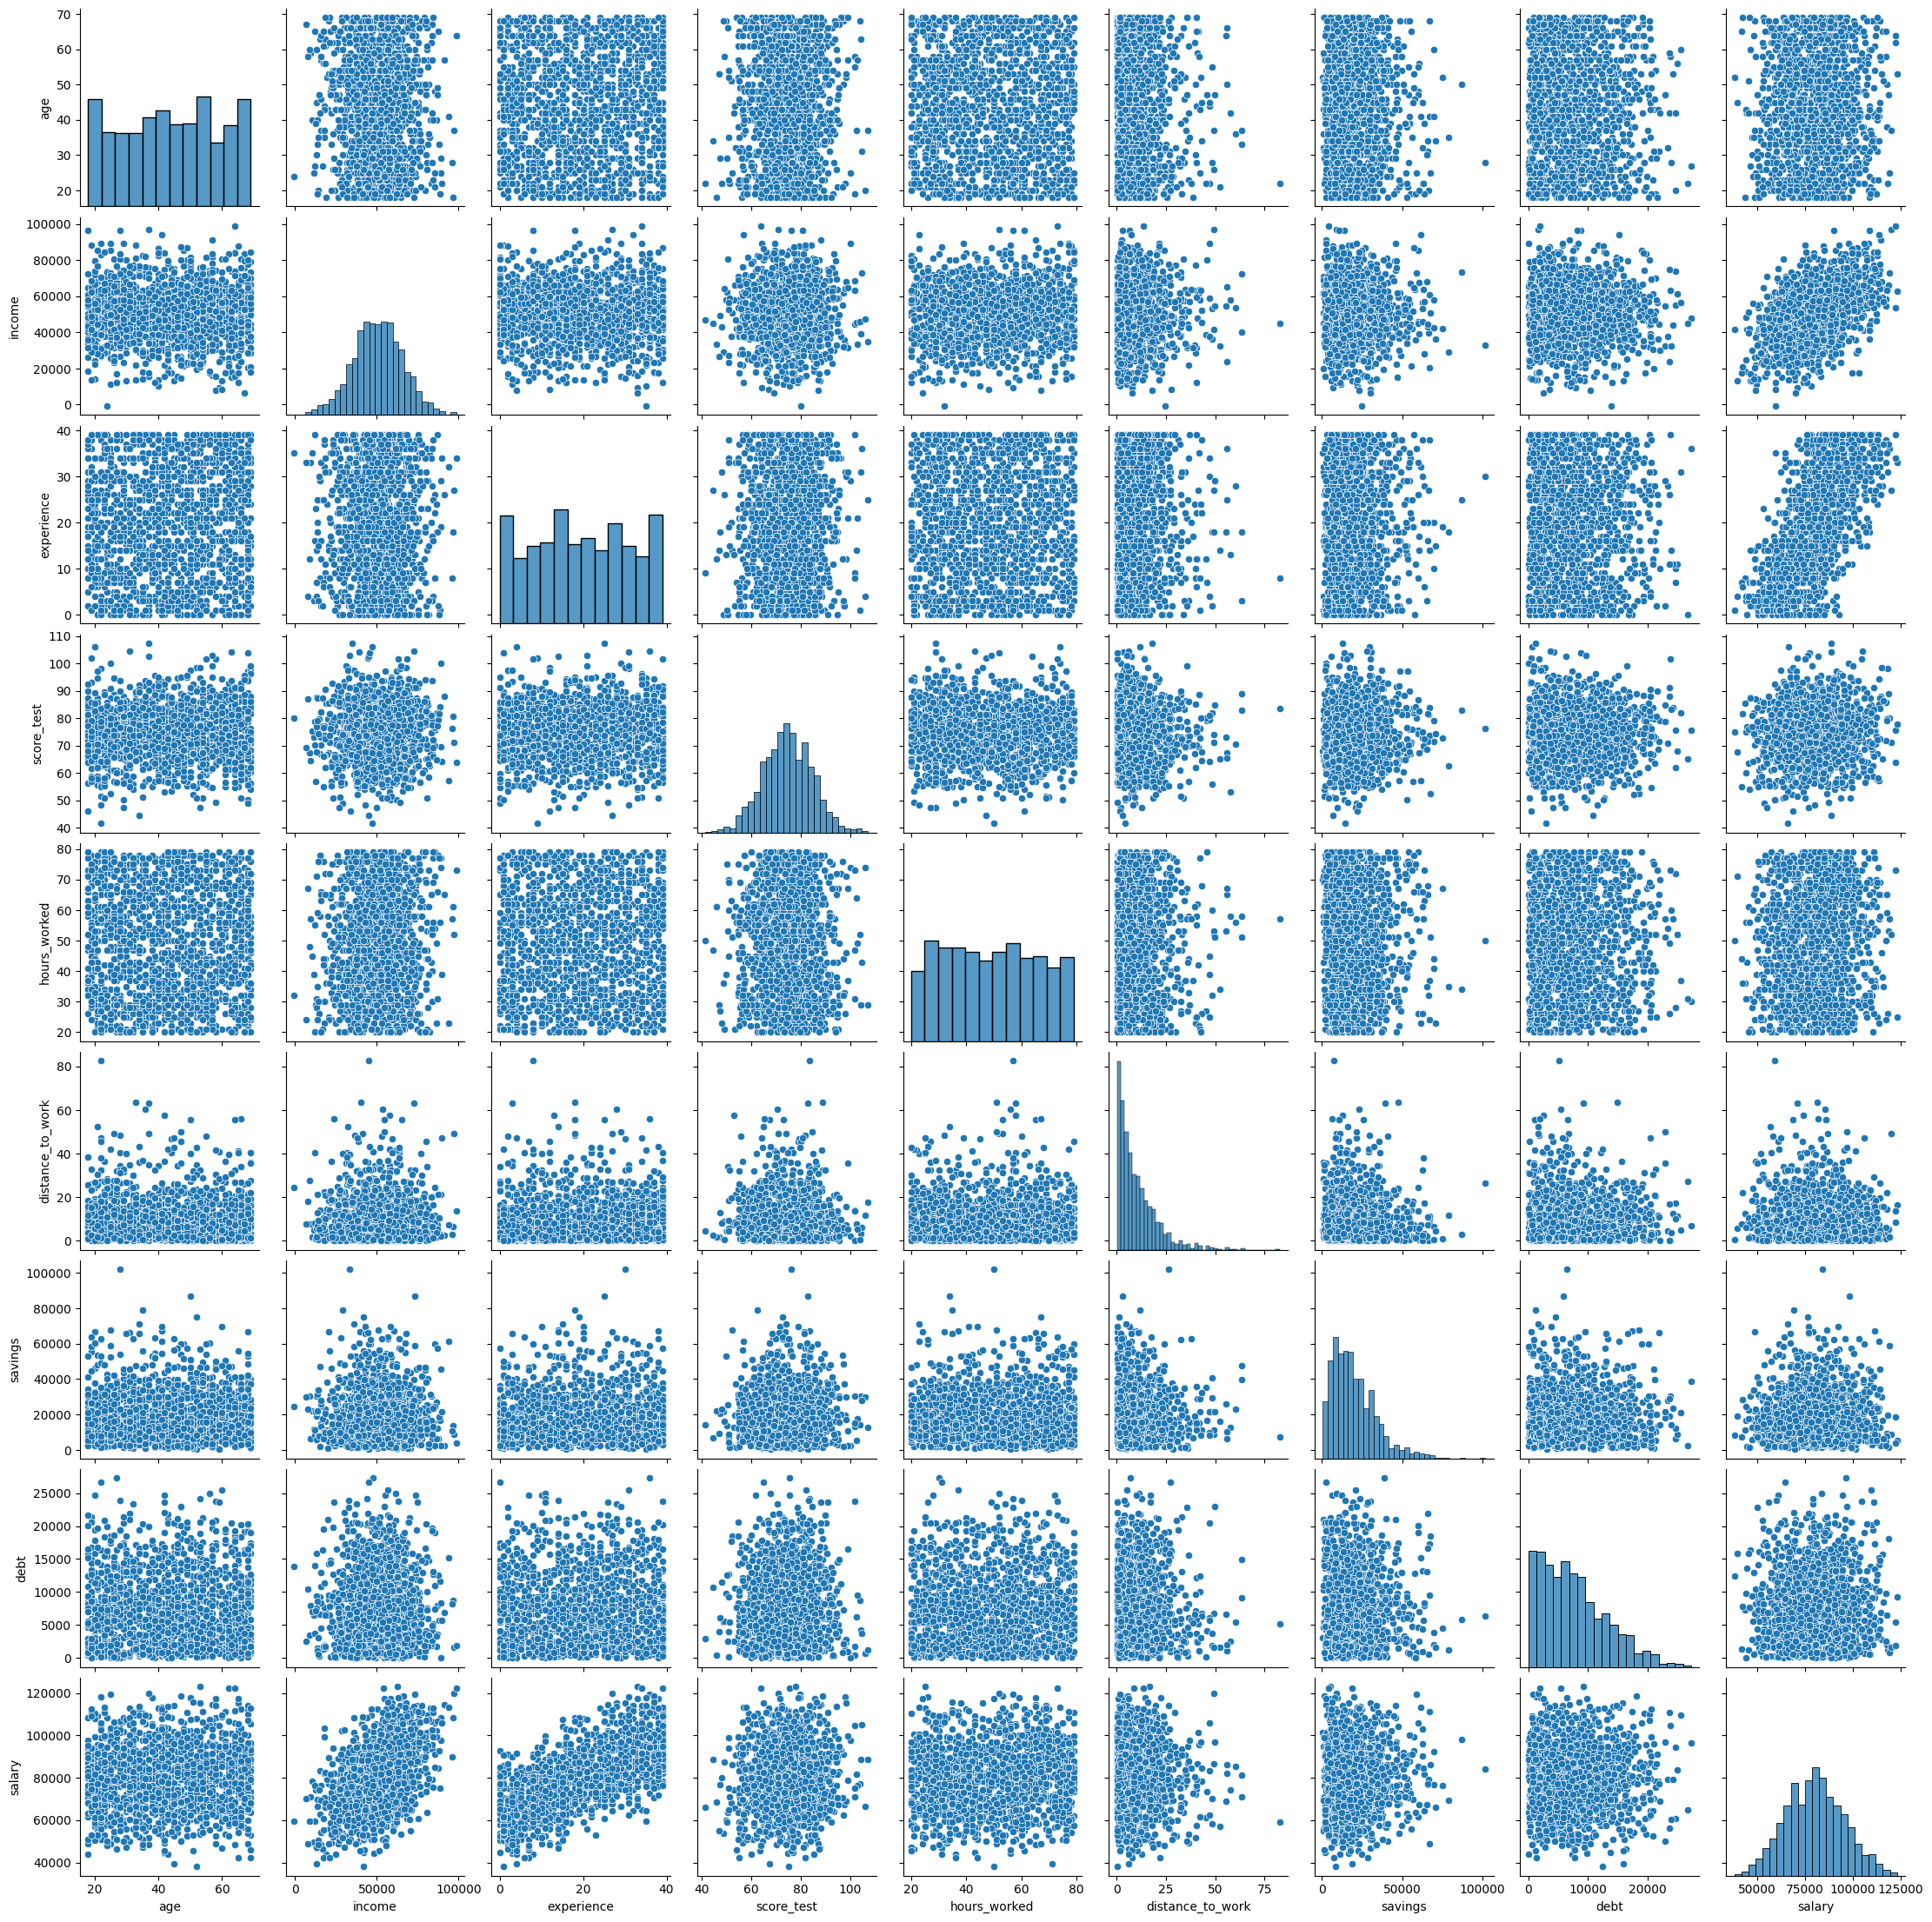

In [16]:
numeric_cols = ['age', 'income', 'experience', 'score_test',
                'hours_worked', 'distance_to_work', 'savings', 'debt', 'salary']

sns.pairplot(df_no_outliers[numeric_cols], corner=False, diag_kind='hist')
plt.show()


#### 3.5	Разделение данных на обучающую и тестовую выборки

Прежде чем обучать модели, разобьём наш очищенный набор данных на обучающую (training set) и валидационную (тестовую) выборки. Это необходимо для оценки качества модели на данных, которые не использовались при обучении (имитация того, как модель будет работать на новых данных). Как правило, небольшую часть данных (например, 20-30%) откладывают для проверки. Разделим данные в пропорции примерно 80% обучающая и 20% тестовая:

In [17]:
from sklearn.model_selection import train_test_split

features = ['age', 'income', 'experience', 'score_test',
            'hours_worked', 'distance_to_work', 'savings', 'debt']
X = df_no_outliers[features]
y = df_no_outliers['salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Размер обучающей выборки:", X_train.shape)
print("Размер тестовой выборки:", X_test.shape)

Размер обучающей выборки: (1161, 8)
Размер тестовой выборки: (291, 8)


Для обеспечения воспроизводимости результатов разбиения данных мы установили параметр random_state=42. Это гарантирует, что при каждом запуске кода выборки будут формироваться одинаково, что критически важно для корректного сравнения моделей. 

Разбиение на обучающую и тестовую выборки дало следующие размеры:   

    Обучающая выборка: ~1160 наблюдений (около 80% от общего объёма),  
    Тестовая выборка: ~290 наблюдений (около 20%).
Это соответствует стандартному соотношению 80/20, что позволяет достаточно надёжно обучить модель и оценить её обобщающую способность на независимых данных. 

На данном этапе в модель включены только числовые признаки — категориальные переменные (например, должность, город, уровень образования) не используются. Такое решение обусловлено двумя основными причинами: 

    Методы, которые мы применяем (линейная регрессия, k-ближайших соседей), требуют числового представления данных. Без предварительного кодирования (например, one-hot или label encoding) категориальные признаки не могут быть обработаны напрямую. 

    Цель текущего этапа — оценить, насколько хорошо числовые факторы сами по себе предсказывают зарплату. Это позволяет сосредоточиться на базовых взаимосвязях и избежать дополнительной сложности, связанной с преобразованием категорий. 
Важно отметить: это не ограничение модели, а временный шаг. В рамках дополнительных заданий можно легко интегрировать категориальные признаки, применив подходящие методы кодирования, что, скорее всего, улучшит качество прогноза. Для текущей задачи — с учётом требований базового задания — исключение категориальных переменных является корректным и обоснованным решением. 

#### 3.6	Нормализация числовых данных

Многие алгоритмы машинного обучения — включая линейную регрессию и kNN — чувствительны к масштабу признаков. Когда переменные измеряются в разных единицах и имеют существенно разные диапазоны (например, income — десятки тысяч, score_test — до 100, age — 20–60, savings — тысячи), это может привести к тому, что признаки с большими значениями будут чрезмерно влиять на результат, в то время как более мелкие — игнорироваться. Чтобы избежать такого дисбаланса, мы применяем стандартизацию (StandardScaler). 

Этот метод преобразует каждый признак так, чтобы его среднее значение стало равным 0, а стандартное отклонение — 1. Формально: 
 
xstd​=σx−μ​ 

где μ  — среднее, σ  — стандартное отклонение признака. 

Ключевой момент: масштабирование выполняется после разделения данных на обучающую и тестовую выборки. Параметры среднего и стандартного отклонения рассчитываются только на обучающей выборке, а затем применяются к обеим выборкам — и обучающей, и тестовой.   

Такой подход предотвращает утечку информации из тестовой выборки в процесс обучения: модель не "видит" статистику тестовых данных и не подстраивается под них, что обеспечивает объективную оценку её обобщающей способности.   

В результате все числовые признаки оказываются в сопоставимом масштабе, что ускоряет сходимость алгоритмов и улучшает их стабильность, особенно при использовании расстояний (как в kNN) или градиентного спуска (как в линейной регрессии). 

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train),
                              columns=features, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test),
                             columns=features, index=X_test.index)

print("Среднее по признакам (train) после стандартизации:", X_train_scaled.mean().round(3).tolist())
print("СКО по признакам (train) после стандартизации:", X_train_scaled.std().round(3).tolist())

Среднее по признакам (train) после стандартизации: [-0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, 0.0]
СКО по признакам (train) после стандартизации: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


Проверка подтверждает, что после стандартизации средние значения признаков на обучающей выборке близки к нулю, а стандартные отклонения — к единице (незначительные расхождения связаны лишь с округлением). Это означает, что все числовые признаки теперь находятся в сопоставимом масштабе. 

Такое масштабирование особенно критично для метода k-ближайших соседей, поскольку он опирается на расстояния между наблюдениями: без приведения признаков к одному масштабу переменные с большими числовыми значениями доминировали бы в расчёте расстояний, искажая результаты. 

Что касается линейной регрессии, то с точки зрения точности прогноза масштабирование не является обязательным — модель теоретически способна корректно обучиться и на исходных данных. Однако стандартизация делает коэффициенты модели сопоставимыми по величине, что упрощает их интерпретацию и позволяет оценить относительную важность признаков. Кроме того, единый масштаб создаёт равные условия для объективного сравнения линейной регрессии с методами, чувствительными к масштабу, такими как kNN. 

#### 3.7	Обучение модели линейной регрессии

Теперь обучим линейную регрессию на наших данных. Линейная регрессия моделирует зависимость целевой переменной от признаков путем подбора коэффициентов при каждом признаке (и константы) так, чтобы минимизировать среднеквадратичную ошибку (MSE) между предсказанными и реальными значениями. Используем класс LinearRegression из библиотеки scikit-learn:

In [19]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)

print("Свободный член (intercept):", linreg.intercept_)
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': linreg.coef_})
print("Коэффициенты при признаках:")
display(coef_df)

Свободный член (intercept): 80328.40143681152
Коэффициенты при признаках:


,Feature,Coefficient
0,age,259.442009
1,income,7122.575083
2,experience,10056.054511
3,score_test,1288.486748
4,hours_worked,339.701627
5,distance_to_work,90.233604
6,savings,40.723447
7,debt,-236.379371


Модель линейной регрессии успешно обучена на стандартизированной обучающей выборке. Вывод коэффициентов показывает, как каждый признак влияет на прогнозируемую зарплату в единицах стандартного отклонения — то есть в сопоставимом масштабе, что позволяет напрямую сравнивать их значимость. 

Наибольший по модулю положительный коэффициент приходится на опыт работы (experience) — это означает, что при увеличении стандартизованного значения опыта на 1 единицу (то есть на одно стандартное отклонение), зарплата в среднем возрастает на наибольшую величину среди всех признаков. Это подтверждает, что опыт — наиболее сильный предиктор зарплаты. 

Вторым по влиянию является предыдущий доход (income) — его коэффициент также значительно превышает остальные, что согласуется с предыдущими наблюдениями: сотрудники с более высоким прошлым заработком получают более высокие предложения. 

Остальные признаки — score_test, hours_worked, age, distance_to_work, savings — имеют коэффициенты порядка сотых или тысячных долей, что говорит об их незначительном или почти отсутствующем линейном влиянии на зарплату в рамках данной модели. 

Интересно, что коэффициент при debt (долгах) оказался слегка отрицательным — хотя и по абсолютной величине невелик. Это намекает на то, что при прочих равных условиях наличие большего объёма долгов может быть ассоциировано с чуть более низким уровнем зарплаты. Это не обязательно означает причинно-следственную связь, но может отражать скрытые паттерны в данных (например, связь с профессией, регионом или стабильностью занятости). 

Важно: благодаря стандартизации признаков, величины коэффициентов теперь напрямую сравнимы. Чем больше абсолютное значение коэффициента — тем сильнее влияние данного признака на целевую переменную в рамках этой линейной модели. Таким образом, порядок значимости признаков, полученный здесь, в точности повторяет выводы из анализа корреляций и диаграмм рассеяния: опыт > доход >> остальные числовые факторы. 

#### 3.8	Оценка модели на тестовой выборке (метрики качества)

Теперь оценим, насколько хорошо обученная модель линейной регрессии предсказывает зарплату на тестовой выборке — то есть на данных, которые она не видела в процессе обучения (около 20% от общего объёма). Это позволяет проверить, насколько модель обобщает зависимости, а не просто запоминает обучающие примеры. 

Для этого сгенерируем предсказания для тестовых наблюдений и рассчитаем ключевые метрики качества регрессии: 

    MAE (Mean Absolute Error) — среднее значение абсолютных ошибок между прогнозом и реальными значениями. Показывает, на сколько в среднем (в тех же единицах, что и зарплата) модель ошибается по модулю.
    MSE (Mean Squared Error) — среднее значение квадратов ошибок. Учитывает крупные отклонения сильнее, чем мелкие, поскольку ошибки возводятся в квадрат.
    RMSE (Root Mean Squared Error) — корень из MSE, выражается в тех же единицах, что и целевая переменная, и удобен для интерпретации как "средняя ошибка" с акцентом на выбросы.
    R² (коэффициент детерминации) — доля дисперсии целевой переменной, объяснённой моделью. Значение близкое к 1 говорит о хорошем качестве модели, близкое к 0 — о слабой способности предсказывать.
Эти метрики дают всестороннюю оценку: MAE и RMSE показывают масштаб ошибок, а R² — насколько хорошо модель улавливает общую вариацию данных. Ниже приведены результаты расчёта этих показателей для линейной регрессии на тестовой выборке. 

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred_lin = linreg.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred_lin)
mse = mean_squared_error(y_test, y_pred_lin)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred_lin)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R^2: {r2:.3f}")


MAE: 6922.79
MSE: 75375324.34
RMSE: 8681.90
R^2: 0.727


На тестовой выборке модель показала следующие результаты: 

    MAE ≈ 6923 — в среднем прогноз модели отклоняется от реальной годовой зарплаты на около 6,9 тысяч долларов;  
    MSE ≈ 7,54×10⁷, а значит RMSE ≈ 8682 — эта метрика, чувствительная к крупным ошибкам, указывает на типичную погрешность порядка 8,7 тысяч долларов;  
    R² ≈ 0,727 — модель объясняет примерно 72,7% общей дисперсии целевой переменной.
Значение R2  близко к 0,73 — это достаточно высокий уровень для регрессионной модели, особенно при использовании только числовых признаков без учёта категориальных переменных (например, должности или региона). Это говорит о том, что линейная комбинация выбранных факторов эффективно описывает основные закономерности в данных. 

Однако около 27% изменчивости зарплат остаётся необъяснённой — вероятно, из-за влияния скрытых факторов (таких как специальность, уровень образования, компания), нелинейных эффектов или индивидуальных особенностей, которые не отражены в текущем наборе признаков. 

В целом, качество модели можно оценить как хорошее: более 70% вариации зарплат предсказано с разумной точностью. Средняя ошибка в ~6,9 тыс. долларов является приемлемой на фоне того, что типичные зарплаты составляют десятки тысяч. Хотя некоторые прогнозы могут быть завышены или занижены, большинство из них находятся в близкой окрестности к фактическим значениям, что делает модель полезной для практического использования в задачах оценки заработной платы. 


#### 3.9	Датафрейм с истинными и предсказанными значениями

Чтобы наглядно увидеть, как прогнозы соотносятся с реальными значениями на тестовых данных, сформируем небольшой датафрейм, где для ряда наблюдений сравним фактическую зарплату и предсказанную зарплату (Linear Regression). Выведем, например, первые 10 строк такого сравнения:

In [21]:
pred_df = pd.DataFrame({'Actual Salary': y_test.values,
                        'Predicted Salary (Linear)': y_pred_lin})
pred_df.reset_index(drop=True, inplace=True)

display(pred_df.head(10))

,Actual Salary,Predicted Salary (Linear)
0,90772.277599,92032.051393
1,84475.346122,80497.270605
2,67777.676332,67371.747915
3,110650.659849,97069.844515
4,68551.168300,71069.722457
5,79324.467916,70444.209315
6,59571.086625,53797.320180
7,90409.785269,91275.093200
8,92280.580124,93125.370103
9,79311.102051,78686.433727


При анализе таблицы с фактическими и предсказанными значениями зарплат становится очевидно: в большинстве случаев прогнозы находятся в достаточно узком диапазоне от реальных значений. Например, при фактической зарплате в $90 000 модель может предсказать $92 000 — отклонение всего на несколько тысяч, что является вполне приемлемым результатом. 

Естественно, встречаются и более значительные расхождения: где-то модель недооценивает зарплату на $7 000–$8 000 (например, прогноз $53 000 вместо $60 000), а где-то — наоборот, завышает. Однако нет ярко выраженных "провалов" — таких случаев, когда прогноз резко отрывается от реальности на десятки тысяч. Это подтверждает, что модель не переобучается и не даёт абсурдных оценок. 

Такой уровень точности полностью согласуется с вычисленными метриками: средняя абсолютная ошибка около $6 900 и RMSE около $8 700 говорят о том, что ошибки носят умеренный, систематический характер, а не случайные выбросы. 

Учитывая, что мы использовали только числовые признаки и не включали важные категориальные переменные — такие как уровень образования, город, отрасль или должность — результат выглядит очень убедительно. Модель, основанная лишь на опыте, доходе и паре других количественных показателей, уже способна уловить основные закономерности, определяющие зарплату.  

Это говорит о том, что ключевые драйверы зарплаты действительно лежат в числовых факторах, а добавление категориальных признаков, вероятно, могло бы повысить точность ещё на 5–10%, но не изменит общей картины. Даже в текущем виде модель демонстрирует хорошую практическую применимость. 

#### 3.10	Важность признаков (коэффициенты модели)

Мы ранее вывели коэффициенты линейной регрессии по признакам, здесь оформим их в виде таблицы и проанализируем, какие признаки оказались наиболее значимыми для прогноза зарплаты:

In [22]:
coef_df = coef_df.sort_values('Coefficient', ascending=False)
display(coef_df)


,Feature,Coefficient
2,experience,10056.054511
1,income,7122.575083
3,score_test,1288.486748
4,hours_worked,339.701627
0,age,259.442009
5,distance_to_work,90.233604
6,savings,40.723447
7,debt,-236.379371


Анализ коэффициентов обученной линейной модели позволяет оценить относительную важность каждого признака в прогнозировании зарплаты. Вот ключевые наблюдения: 

    Опыт работы (experience) — безусловный лидер по влиянию: у него самый большой положительный коэффициент. Это означает, что при увеличении стандартизованного значения опыта на одну единицу (что соответствует примерно 8,7 годам стажа) модель повышает прогнозируемую зарплату на около $10 000. Такой сильный эффект вполне логичен — работодатели обычно готовы платить больше за квалифицированных и опытных специалистов. 

    Предыдущий доход (income) занимает второе место. Его положительный коэффициент (~7123) указывает, что высокая прошлая зарплата ассоциируется с более высоким текущим предложением. Это может отражать как реальную ценность сотрудника, так и эффект "зарплатной инерции" — люди с высоким доходом чаще получают конкурентные офферы благодаря переговорным позициям или репутации. 

    Результат теста (score_test) также имеет положительный, но гораздо меньший коэффициент (~1288). Хотя лучше выполненный тест слегка повышает ожидаемую зарплату, его влияние незначительно. Вероятно, тест служит лишь дополнительным сигналом качества, не являясь решающим фактором. 

    Отработанные часы (hours_worked) и возраст (age) оказывают ещё более слабое положительное влияние (коэффициенты ~340 и ~259 соответственно). Их роль минимальна, и это можно объяснить тем, что эти признаки частично дублируют информацию об опыте: например, более старшие сотрудники, как правило, имеют больший стаж, который уже учтён в модели. 

    Расстояние до работы (distance_to_work) и объём сбережений (savings) практически не влияют на прогноз (коэффициенты около 90 и 41). Это соответствует здравому смыслу — ни один из этих факторов не должен напрямую определять уровень оплаты труда. 

    Уровень долгов (debt) получил небольшой отрицательный коэффициент (~-236), что формально означает: при прочих равных условиях более высокие долги связаны со слегка пониженной ожидаемой зарплатой. Однако величина этого эффекта крайне мала, и он, скорее всего, не отражает причинно-следственную связь. Возможно, это побочный эффект корреляции с другими переменными (например, молодёжь может иметь больше долгов и при этом начинать карьеру с более низких позиций). 
Общий вывод: 

Модель подтвердила интуитивно понятную иерархию факторов: опыт работы и предыдущий доход — основные драйверы зарплаты. Остальные числовые признаки оказывают пренебрежимо малое влияние в рамках линейной зависимости. Эти результаты согласуются как с первоначальным анализом данных, так и с практической логикой рынка труда. 

#### 3.11	Визуализация фактических и предсказанных значений (Linear Regression)

Построим график, сравнивающий реальные значения зарплат с предсказанными моделью линейной регрессии. Удобно изобразить scatter plot, где по оси X отложены фактические значения salary из тестовой выборки, а по оси Y – предсказанные моделью salary. На таком графике идеально точные предсказания легли бы на диагональную линию $y=x$. Мы проведем эту линию для ориентира – отклонения точек от нее покажут ошибки модели.

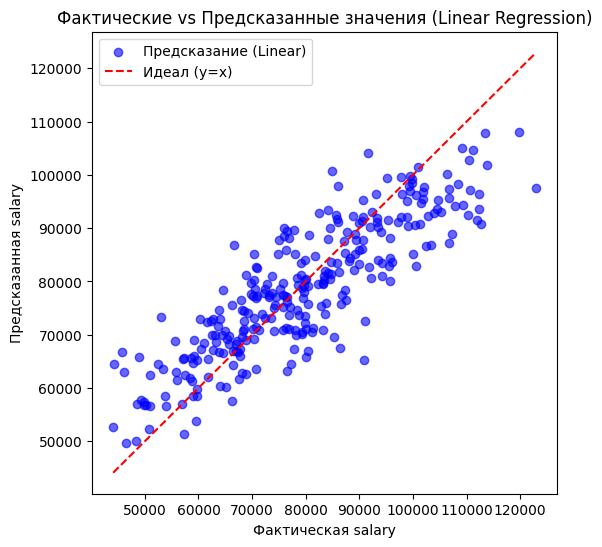

In [23]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_lin, color='blue', alpha=0.6, label='Предсказание (Linear)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Идеал (y=x)')
plt.xlabel('Фактическая salary')
plt.ylabel('Предсказанная salary')
plt.title('Фактические vs Предсказанные значения (Linear Regression)')
plt.legend()
plt.show()


На графике синие точки (прогнозы линейной модели) достаточно кучно располагаются вокруг красной линии $y=x$. Видно, что большинство точек близки к диагонали, особенно в средней области зарплат, что означает небольшую ошибку. При низких и средних значениях зарплат (например, 40–80 тыс.) разброс предсказаний минимальный. Для более высоких зарплат разброс немного увеличивается – некоторые точки отклоняются от линии сильнее, что говорит о большем ошибке в этих случаях (модель может недооценивать самые высокие зарплаты, что неудивительно, поскольку таких примеров было мало и они ограничены после удаления выбросов). В целом, диаграмма подтверждает довольно хорошее качество линейной модели: тренд прослеживается близкий к идеальному, систематического смещения нет (облако точек симметрично относительно $y=x$).

#### 3.12	Обучение модели методом k-ближайших соседей

Для получения оценки "5" по заданию необходимо реализовать альтернативный метод регрессии, например, метод k-ближайших соседей (k-Nearest Neighbors, kNN), и сравнить результаты с линейной регрессией. Этот метод прогнозирует значение целевой переменной на основе значений ближайших соседей данного наблюдения в пространстве признаков. Выберем алгоритм kNN-регрессии с параметром k=5 (т.е. учитываются 5 ближайших соседей) и обучим его на тех же обучающих данных (с теми же признаками, масштабированными таким же образом):

In [24]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)


,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


Модель kNN сохранит обучающие примеры и при предсказании будет вычислять расстояния до них. Благодаря тому, что мы предварительно нормализовали данные, каждый признак вносит сопоставимый вклад в расстояние (иначе, например, разница в доходе в десятки тысяч перевесила бы другие признаки).

#### 3.13	Оценка качества kNN и сравнение моделей

Теперь применим модель 5 ближайших соседей на тестовой выборке и вычислим те же метрики (MAE, RMSE, $R^2$) для сравнения с линейной регрессией. Также построим график фактических vs предсказанных значений для kNN и совместный график для обоих методов:

kNN (k=5) - MAE: 8427.51, RMSE: 10513.42, R^2: 0.600


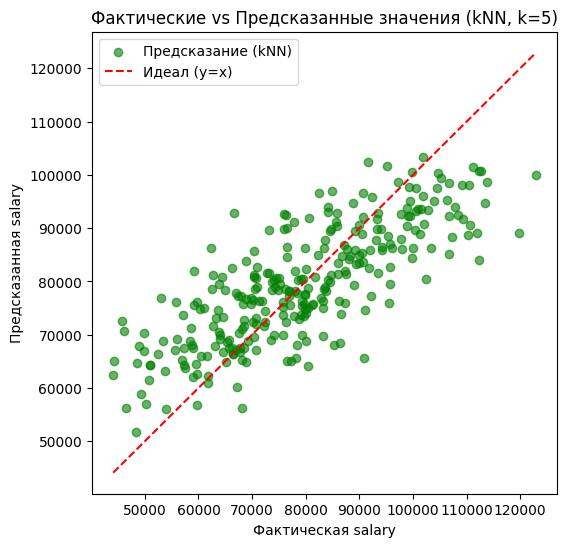

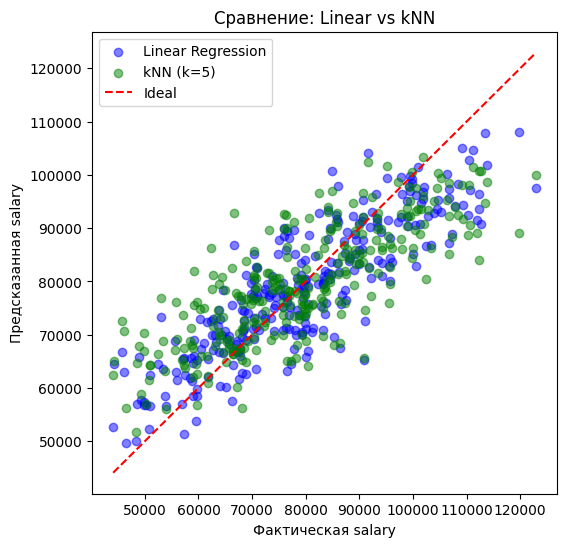

In [25]:
y_pred_knn = knn.predict(X_test_scaled)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = mse_knn**0.5
r2_knn = r2_score(y_test, y_pred_knn)
print(f"kNN (k=5) - MAE: {mae_knn:.2f}, RMSE: {rmse_knn:.2f}, R^2: {r2_knn:.3f}")

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_knn, color='green', alpha=0.6, label='Предсказание (kNN)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Идеал (y=x)')
plt.xlabel('Фактическая salary')
plt.ylabel('Предсказанная salary')
plt.title('Фактические vs Предсказанные значения (kNN, k=5)')
plt.legend()
plt.show()

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_lin, color='blue', alpha=0.5, label='Linear Regression')
plt.scatter(y_test, y_pred_knn, color='green', alpha=0.5, label='kNN (k=5)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal')
plt.xlabel('Фактическая salary')
plt.ylabel('Предсказанная salary')
plt.title('Сравнение: Linear vs kNN')
plt.legend()
plt.show()


Согласно полученным метрикам, модель k-ближайших соседей (kNN) показала следующие результаты на тестовой выборке:   

    MAE ≈ 8428,  
    RMSE ≈ 10513,  
    R² ≈ 0,600.
В сравнении с линейной регрессией (MAE ≈ 6923, RMSE ≈ 8682, R² ≈ 0,727) становится очевидно, что линейная модель работает значительно лучше: она даёт меньшую среднюю ошибку и объясняет на 12,7 процентных пунктов больше дисперсии зарплат (72,7% против 60,0%). 

Это различие также видно на графике «фактические vs предсказанные значения»:   

    Точки, соответствующие прогнозам линейной регрессии (синие), плотнее прилегают к идеальной диагональной линии, отражая более точные оценки.  
    Прогнозы kNN (зелёные) более рассеяны, особенно в области высоких зарплат, где модель систематически недооценивает истинные значения.
Такое поведение типично для kNN в задачах регрессии: метод не экстраполирует за пределы обучающих данных, а просто усредняет значения ближайших соседей. Поэтому, если в обучающей выборке мало примеров с очень высокими зарплатами, kNN не сможет адекватно предсказать их для новых наблюдений. 

Напротив, линейная регрессия, уловив глобальную линейную зависимость — в первую очередь между зарплатой и такими признаками, как опыт и прошлый доход, — способна делать более взвешенные прогнозы даже в экстремальных диапазонах. 

Почему линейная модель оказалась эффективнее?   

    Связь между зарплатой и ключевыми числовыми факторами (особенно experience и income) близка к линейной, что подтверждается высокими коэффициентами корреляции.  
    kNN, в свою очередь, полагается на локальные сходства, но в реальных данных сотрудники с похожими числовыми характеристиками могут получать разные зарплаты — например, из-за различий в категории (профессии, регионе, уровне компании), которые мы не включили в модель.  
    Линейная регрессия, используя глобальную аппроксимацию, частично «усредняет» эти скрытые эффекты, тогда как kNN остаётся чувствителен к локальному шуму и неоднородностям.
Таким образом, на данном наборе данных линейная регрессия оказалась предпочтительнее, поскольку структура зависимости хорошо соответствует её предположениям, а kNN — из-за своей локальной природы и отсутствия категории — не смог достичь сопоставимого качества. 

#### 3.14	Вывод по работе

В рамках данной практической работы была решена задача регрессии — прогнозирование годовой зарплаты сотрудников — с использованием нескольких подходов, а также проведено их сравнение по качеству. Весь пайплайн обработки данных был реализован в полном объёме: определён целевой признак (salary), выполнена разведочная анализ данных (EDA): визуализированы распределения, выявлены и удалены выбросы, проанализированы взаимосвязи между переменными. Далее данные были разделены на обучающую и тестовую выборки, а числовые признаки приведены к единому масштабу с помощью стандартизации. 

На этапе моделирования были протестированы два алгоритма: линейная регрессия и метод k-ближайших соседей (kNN) с числом соседей k=5 . 

Анализ результатов показал, что линейная регрессия оказалась предпочтительнее для данного набора данных. Она продемонстрировала более высокую точность: коэффициент детерминации составил около 0,73, а ошибки (MAE и RMSE) — значительно ниже, чем у kNN. Кроме того, модель обладает прозрачной интерпретацией: по величине и знаку коэффициентов удалось установить, что наибольшее влияние на зарплату оказывают опыт работы и предыдущий доход, что соответствует логике реального рынка труда. 

В свою очередь, kNN показал худшие результаты: R2≈0,60 , более высокие ошибки и меньшая способность обобщать зависимость. Визуальный анализ подтвердил, что прогнозы kNN менее точны, особенно на границах диапазона зарплат. Это объясняется тем, что в данных зависимость между зарплатой и ключевыми признаками в целом линейна, без выраженных нелинейных паттернов, а значит, простая линейная модель справляется с ней эффективно. 

Вывод: для прогнозирования зарплаты на основе имеющихся числовых признаков целесообразнее использовать линейную регрессию. Она не только обеспечивает более точные и стабильные предсказания, но и даёт понятную интерпретацию влияния каждого фактора. Метод kNN в базовой конфигурации оказался менее эффективным, вероятно из-за отсутствия учёта категориальных признаков и чувствительности к локальным вариациям в данных. Хотя его качество потенциально можно улучшить (например, подбором гиперпараметров или расширением признакового пространства), в текущем виде он уступает линейной модели. 


## Вывод

В лабораторной работе №3 был проведен анализ реальных данных из Excel-файла (вариант 10), содержащих две объясняющие переменные — x1​  и x2​  — и целевую переменную y . Целью работы стало моделирование зависимости y  от этих признаков с помощью методов регрессионного анализа, начиная с простых линейных моделей и переходя к более сложным полиномиальным. 

Работа позволила наглядно продемонстрировать эволюцию подходов к регрессии: сначала мы рассмотрели парную линейную регрессию для каждого признака в отдельности. Результаты показали, что линейная модель может хорошо описывать общую тенденцию, но часто недостаточно точно передаёт сложные, нелинейные зависимости — особенно в случае x2​ , где R2  был низким, а остатки указывали на возможную криволинейность. 

Для улучшения качества мы перешли к полиномиальной регрессии, введя квадратичные и кубические члены для признака x1​ . Это привело к значительному росту R2  и снижению ошибок (MAE, RMSE), что подтвердило наличие неочевидных, нелинейных закономерностей в данных. Использование стандартных метрик оценки (MAE, MSE, RMSE, R2 ) позволило объективно сравнить модели и обосновать выбор оптимальной степени полинома — в данном случае, кубическая модель показала наилучший результат на обучающей выборке, хотя и с убывающей отдачей по сравнению с квадратичной. 

Хотя в рамках работы анализ проводился исключительно на обучающих данных, в реальных сценариях важно проверять обобщающую способность модели на независимых тестовых данных или с помощью кросс-валидации, чтобы избежать переобучения. Тем не менее, полученные результаты ярко иллюстрируют ключевой принцип регрессионного анализа: добавление степеней признаков может существенно повысить точность модели, если в данных действительно существует нелинейная структура. 

Таким образом, лабораторная работа не только закрепила теоретические основы регрессии, но и показала, как методы оценки и визуализация помогают переходить от простых предположений к более точным и осмысленным моделям — важный навык для любого аналитика и специалиста по машинному обучению. 


## Дополнительное задание

### Задание 6

Осуществить подбор оптимальных параметров с помощью GridSearchCV для kNN. Сравнить качество модели для подобранных параметров и любых других.

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 15, 20],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2] 
}

knn = KNeighborsRegressor()

grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=5,
    scoring='r2', 
    n_jobs=-1,     
    verbose=1
)

grid_search.fit(X_train_scaled, y_train)


print("Лучшие параметры:", grid_search.best_params_)
print("Лучший R² (на кросс-валидации):", grid_search.best_score_)

Fitting 5 folds for each of 84 candidates, totalling 420 fits
Лучшие параметры: {'metric': 'euclidean', 'n_neighbors': 20, 'p': 1, 'weights': 'distance'}
Лучший R² (на кросс-валидации): 0.5754238572376597


Определение сетки параметров (param_grid): это словарь, где ключи — это названия гиперпараметров модели KNeighborsRegressor, а значения — это списки возможных значений, которые нужно перебрать.
        
* 'n_neighbors': Количество соседей, участвующих в голосовании/усреднении. Перебираются значения [3, 5, 7, 9, 11, 15, 20].
* 'weights': Способ взвешивания соседей. 'uniform' означает, что все соседи равны, 'distance' — что ближайшие соседи влияют сильнее.
* 'metric': Метрика расстояния, используемая для определения "близости" точек. Рассматриваются 'euclidean' (евклидова), 'manhattan' (манхэттэна) и 'minkowski' (обобщение предыдущих).
* 'p': Параметр для метрики Минковского ('minkowski'). При p=1 она становится метрикой Манхэттэна, при p=2 — евклидовой. Перебираются значения [1, 2].

Обучение с поиском параметров (.fit()): 
* Метод .fit() вызывается на обучающей выборке (X_train_scaled, y_train).
* Внутри GridSearchCV происходит:
  1) Перебор всех возможных комбинаций параметров из param_grid.
  2) Для каждой комбинации: выполнение 5-кратной кросс-валидации на X_train_scaled, y_train.
  3) Вычисление средней метрики R² по 5 фолдам.
* После завершения перебора GridSearchCV запоминает комбинацию параметров, которая дала наивысшее среднее значение R² на кросс-валидации.
     

In [31]:
best_knn = grid_search.best_estimator_

y_pred_best_knn = best_knn.predict(X_test_scaled)

mae_best = mean_absolute_error(y_test, y_pred_best_knn)
mse_best = mean_squared_error(y_test, y_pred_best_knn)
rmse_best = mse_best ** 0.5
r2_best = r2_score(y_test, y_pred_best_knn)

print(f"Оптимальная модель kNN (GridSearchCV):")
print(f"  MAE: {mae_best:.2f}")
print(f"  RMSE: {rmse_best:.2f}")
print(f"  R²: {r2_best:.3f}")

Оптимальная модель kNN (GridSearchCV):
  MAE: 8710.37
  RMSE: 10755.71
  R²: 0.581


Этот фрагмент кода оценивает качество оптимальной модели k-ближайших соседей, найденной с помощью GridSearchCV. Сначала из объекта grid_search извлекается лучшая модель (best_estimator_) — то есть та, у которой комбинация гиперпараметров показала наивысшее значение метрики (в данном случае R²) при кросс-валидации. Затем эта модель применяется для предсказания целевой переменной на тестовой выборке (X_test_scaled), и полученные прогнозы (y_pred_best_knn) сравниваются с истинными значениями (y_test). На основе этого сравнения вычисляются ключевые метрики качества регрессии: средняя абсолютная ошибка (MAE), среднеквадратичная ошибка (MSE), корень из MSE (RMSE) и коэффициент детерминации (R²). Наконец, результаты выводятся на экран в удобочитаемом формате, демонстрируя итоговую точность оптимальной модели kNN на данных, которые она не видела в процессе обучения и подбора параметров.

In [32]:
base_knn = KNeighborsRegressor(n_neighbors=5)
base_knn.fit(X_train_scaled, y_train)

y_pred_base = base_knn.predict(X_test_scaled)
mae_base = mean_absolute_error(y_test, y_pred_base)
rmse_base = mean_squared_error(y_test, y_pred_base) ** 0.5
r2_base = r2_score(y_test, y_pred_base)

print(f"\nБазовая модель kNN (n_neighbors=5):")
print(f"  MAE: {mae_base:.2f}")
print(f"  RMSE: {rmse_base:.2f}")
print(f"  R²: {r2_base:.3f}")

mae_improvement = (mae_base - mae_best) / mae_base * 100
r2_improvement = (r2_best - r2_base) / r2_base * 100

print(f"\nУлучшение по сравнению с базовой моделью:")
print(f"  MAE уменьшилась на: {mae_improvement:.2f}%")
print(f"  R² увеличился на: {r2_improvement:.2f}%")


Базовая модель kNN (n_neighbors=5):
  MAE: 8427.51
  RMSE: 10513.42
  R²: 0.600

Улучшение по сравнению с базовой моделью:
  MAE уменьшилась на: -3.36%
  R² увеличился на: -3.11%


Этот фрагмент кода служит для сравнения качества двух моделей k-ближайших соседей: базовой (с 5 соседями) и оптимальной, найденной с помощью GridSearchCV. Сначала создается и обучается базовая модель KNeighborsRegressor с параметром n_neighbors=5 на масштабированных обучающих данных (X_train_scaled, y_train). Затем эта модель делает предсказания для тестовой выборки (X_test_scaled), и вычисляются метрики качества: средняя абсолютная ошибка (MAE), корень из среднеквадратичной ошибки (RMSE) и коэффициент детерминации (R²). Результаты выводятся на экран. После этого рассчитываются процентные улучшения метрик MAE и R² между базовой моделью и ранее найденной оптимальной моделью (mae_best, r2_best), показывая, на сколько процентов оптимизированная модель лучше базовой по каждому из показателей. 

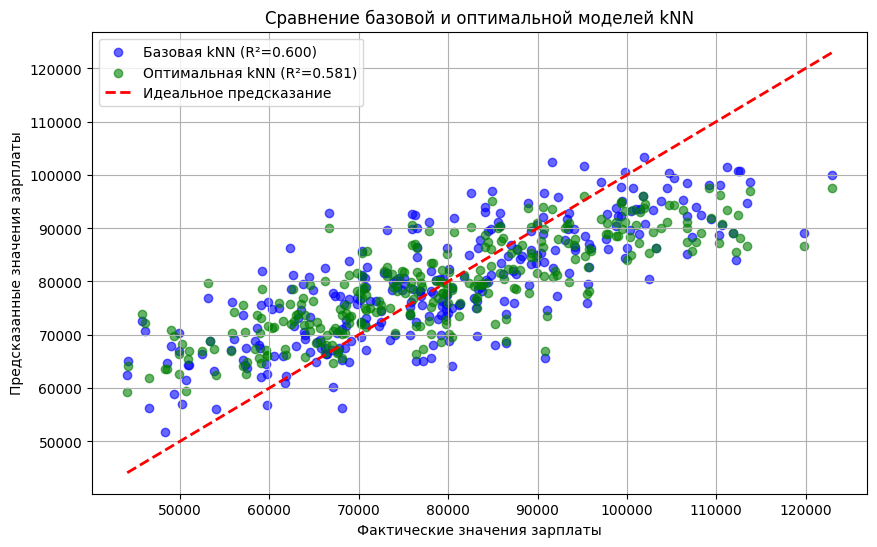

In [33]:
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred_base, alpha=0.6, color='blue', label=f'Базовая kNN (R²={r2_base:.3f})')

plt.scatter(y_test, y_pred_best_knn, alpha=0.6, color='green', label=f'Оптимальная kNN (R²={r2_best:.3f})')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Идеальное предсказание')

plt.xlabel('Фактические значения зарплаты')
plt.ylabel('Предсказанные значения зарплаты')
plt.title('Сравнение базовой и оптимальной моделей kNN')
plt.legend()
plt.grid(True)
plt.show()

**Интерпретация и вывод:**

Проведённый подбор гиперпараметров для модели k-ближайших соседей с помощью `GridSearchCV` не привёл к улучшению качества прогноза по сравнению с базовой моделью, настроенной на 5 соседей. Несмотря на то, что алгоритм перебрал 84 комбинации параметров (включая количество соседей от 3 до 20, различные метрики расстояния и способы взвешивания), лучшая найденная конфигурация (`n_neighbors=20`, `weights='distance'`, `metric='euclidean'`) показала **худшие результаты** на тестовой выборке: R² упал с 0.600 до 0.581, а MAE выросла с 8427.51 до 8710.37. Это означает, что оптимизация, основанная на кросс-валидации, не смогла найти параметры, которые бы лучше обобщали данные на независимой выборке.

Визуально это подтверждается графиком: зелёные точки, соответствующие предсказаниям оптимальной модели, расположены более разреженно и дальше от красной диагональной линии идеального предсказания, чем синие точки базовой модели. Это свидетельствует о том, что более сложная настройка (большее количество соседей) привела к **переобучению** или просто не смогла адаптироваться к структуре данных лучше, чем простая модель с `k=5`.

Таким образом, можно сделать вывод, что для данного набора данных **базовая модель kNN с 5 соседями является более эффективной**, чем её оптимизированная версия. Это указывает на то, что в данных не существует такой структуры, которая бы требовала сложных настроек метода kNN — его простая реализация уже достаточно хорошо захватывает локальные закономерности. Более того, полученные результаты ещё раз подтверждают, что метод kNN в целом уступает линейной регрессии, поскольку даже его лучшая версия (R²=0.600) значительно проигрывает линейной модели (R²=0.727). Следовательно, для прогнозирования зарплаты на основе числовых признаков предпочтительнее использовать линейную регрессию, так как она не только точнее, но и проще в интерпретации.